In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from math import sqrt

### 1.Load the data from “cereal.csv” and plot histograms of sugar and vitamin content across different cereals.

In [2]:
# Reading the Data file
df = pd.read_csv('FyntraCustomerData.csv')
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### 1. Compute -- Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Is there a correlation?

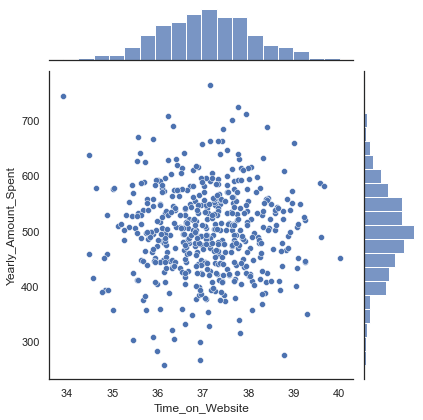

In [5]:
data = df.filter(['Time_on_Website', 'Yearly_Amount_Spent'])
sns.set(style="white", color_codes=True)
sns.jointplot(x="Time_on_Website",
              y="Yearly_Amount_Spent", data=data)

<AxesSubplot:>

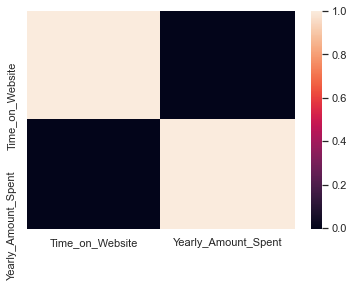

In [6]:
coff_Web_Time_Amount = data.corr()
sns.heatmap(coff_Web_Time_Amount)

- There is no correlation between Time on Website and Yearly Amount Spent.

### 2. Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One?

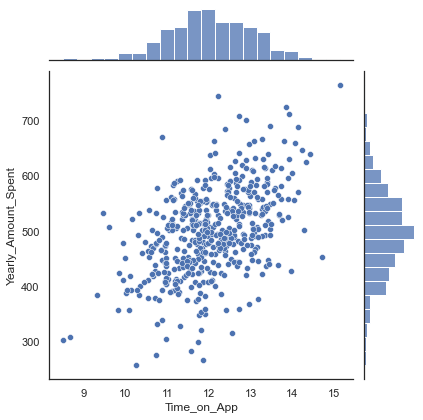

In [7]:
data1 = df.filter(['Time_on_App', 'Yearly_Amount_Spent'])
sns.set(style="white", color_codes=True)
sns.jointplot(x="Time_on_App",
              y="Yearly_Amount_Spent", data=data1)

<AxesSubplot:>

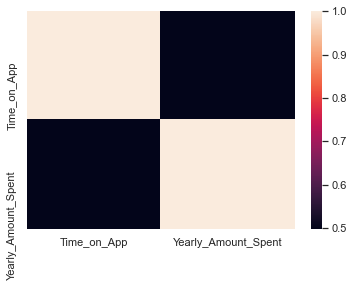

In [8]:
coff_App_Time_Amount = data1.corr()
sns.heatmap(coff_App_Time_Amount)

- Yes the correlation is stronger between Time on App and Yearly Amount Spent than 1st one.

### 3. Compute -- Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

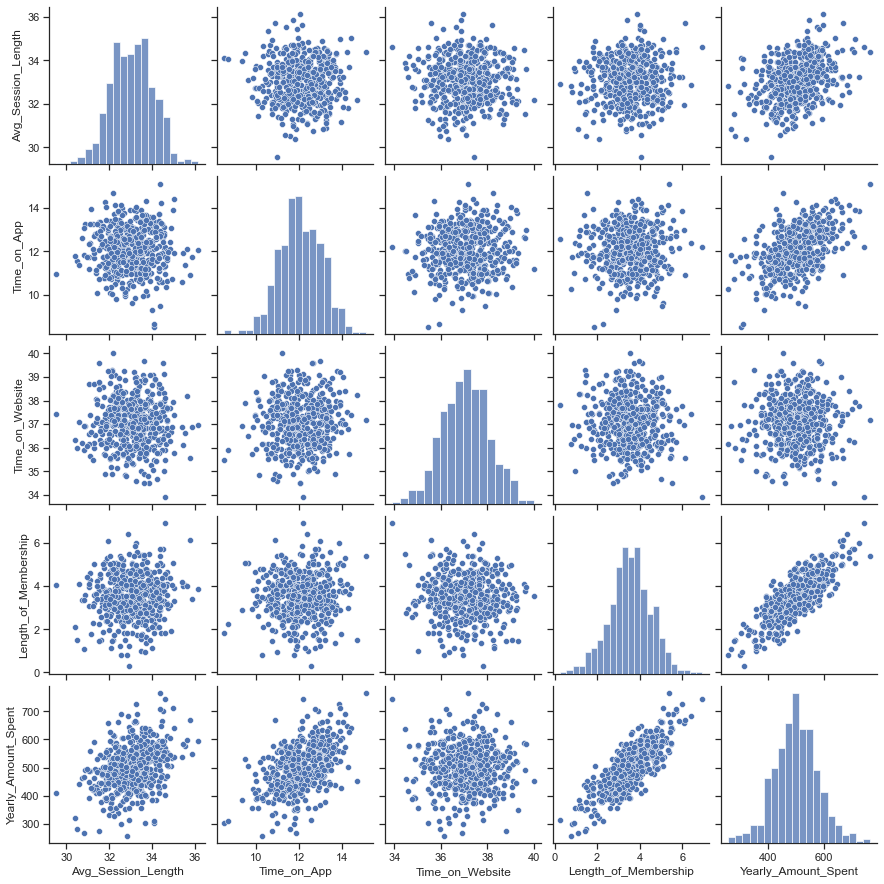

In [9]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

In [10]:
df.corr()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
Avg_Session_Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time_on_App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time_on_Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length_of_Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly_Amount_Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


- Based on this plot Length_of_Membership looks to be the most correlated feature with Yearly Amount Spent.

### 4. Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

In [11]:
x = df['Length_of_Membership']
y = df['Yearly_Amount_Spent']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.85, random_state=0)

In [12]:
linear_reg = LinearRegression()
linear_reg.fit(pd.DataFrame(x_train), y_train)

LinearRegression()

### 5. Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85?

- The random_state splits a randomly selected data but with a twist.
- And the twist is the order of the data will be same for a particular value of random_state.
- You need to understand that it's not a bool accpeted value. starting from 0 to any integer no,
- if you pass as random_state,it'll be a permanent order for it.

- Ex: the order you will get in random_state=0 remain same. After that if you execut it random_state=5 and again come back to random_state=0 you'll get the same order.
- And like 0 for all integer will go same. How ever random_state=None splits randomly each time.

### 6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?

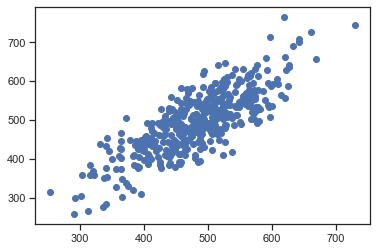

In [13]:
# Predicting the data of linear regression model
y_predict = linear_reg.predict(pd.DataFrame(x_test))
plt.scatter(y_predict, y_test)
plt.show()

- Actual and predicted data match to some extent.

### 7. What is the value of Root Mean Squared Error?

In [14]:
print("Root Mean Square Error is:",sqrt(mean_squared_error(y_test, y_predict)))

Root Mean Square Error is: 49.831828588803404
